# Python для анализа данных

## ДЗ 3

*Придумывал: Ян Пиле, НИУ ВШЭ*  

## Задача 1

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучший фильм за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга?
    2. Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или Paramount Pictures и насколько больше?

In [1]:
import requests
Oscar_movie_url = requests.get('https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара').text
#print(website_url)

from bs4 import BeautifulSoup
Oscar_movie = BeautifulSoup(Oscar_movie_url, 'lxml')

My_Oscar_movie = Oscar_movie.find_all('table',{'class':'wikitable'})
My_Oscar_movie


import re

#Изучив структуру страницы, видим, что в 11 первых таблицах находится нужная нам информация

years = []
numbers = []
movies = []
winners = []
companies = []
producers = []

i = 0
j = 0
k = 0

for i in range(11):
    rows = My_Oscar_movie[i].find_all('tr')
    for k in range(1,len(rows)):
        # years
        data = rows[k].find_all('td')[0]
        # добавляем в years ровно столько раз год, сколько фильмов в нем было номинировано (по свойству rowspan)
        if int(data.attrs.get('rowspan',0)) > 0:
            for j in range(int(data.attrs.get('rowspan',0))):
                yr = rows[k].find_all('td')[0].get_text().strip().split()
                years.append(yr[0])
                numbers.append(yr[1])
            # если в названии фильма стоит символ победителя, то записываем этот символ в отдельный столбец winners
            # если в названии фильма не стоит символ победителя, то в столбец winners записываем ''
            mv = rows[k].find_all('td')[1].get_text().strip()
            if (mv[0] == '★'):
                winners.append(mv[0])
                movies.append(re.sub('★ ','',mv))
            else:
                winners.append('')
                movies.append(rows[k].find_all('td')[1].get_text().strip())
            companies.append(rows[k].find_all('td')[2].get_text().strip())
            producers.append(rows[k].find_all('td')[3].get_text().strip())
        # если у строк нет свойства rowspan, то обрабатываем их со смещением на 1 влево, так как нумерация столбцов
        # начинается не с года, а с названия фильма
        else:
            mv = rows[k].find_all('td')[0].get_text().strip()
            if (mv[0] == '★'):
                winners.append(mv[0])
                movies.append(re.sub('★ ','',mv))
            else:
                winners.append('')
                movies.append(rows[k].find_all('td')[0].get_text().strip())
            companies.append(rows[k].find_all('td')[1].get_text().strip())
            producers.append(rows[k].find_all('td')[2].get_text().strip())

#rows

import pandas as pd
df = pd.DataFrame({'Years': years, 'Number of ceremony': numbers, 'Movies': movies, 'Winner': winners, 'Companies': companies, 'Producers': producers})


count_spl = 0
for x in producers:
    if re.search('Стивен Спилберг', x) is not None:
        count_spl += 1

print('Фильмы, созданные при участии Стивена Спилберга были номнированы '+str(count_spl)+' раз')

# Считаем номинации кинокомпаний
count_wb = 0
count_pm = 0
for i in range(len(companies)):
    if re.search('Warner Bros.', companies[i]) is not None and winners[i] == '★':
        count_wb += 1
    if re.search('Paramount Pictures', companies[i]) is not None and winners[i] == '★':
        count_pm += 1

if count_wb > count_pm:
    print('Компания Warner Bros. получила больше всего Оскаров за лучший фильм - '+str(count_wb))
    print('У компании Warner Bros. Оскаров за лучший фильм на '+str(count_wb-count_pm)+' больше, чем у компании Paramount Pictures')
elif count_wb < count_pm:
    print('Компания Paramount Pictures получила больше всего Оскаров за лучший фильм - '+str(count_pm))
    print('У компании Paramount Pictures Оскаров за лучший фильм на '+str(count_pm-count_wb)+' больше, чем у компании Warner Bros.')
elif count_wb == count_pm:
    print('Компании Warner Bros. и Paramount Pictures получили одинаковое количество Оскаров за лучший фильм - '+str(count_wb))

#df

Фильмы, созданные при участии Стивена Спилберга были номнированы 10 раз
Компания Warner Bros. получила больше всего Оскаров за лучший фильм - 10
У компании Warner Bros. Оскаров за лучший фильм на 1 больше, чем у компании Paramount Pictures


## Задача 2

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучшую женскую роль за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Какая актриса чаще всего номинировалась на Оскар?
    2. Насколько отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте?

In [2]:
import requests
import re
from bs4 import BeautifulSoup
Oscar_actress_url = requests.get('https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль').text
Oscar_actress = BeautifulSoup(Oscar_actress_url, 'lxml')

My_Oscar_actress = Oscar_actress.find_all('table',{'class':'wikitable'})
#My_Oscar_actress[10]

#Изучив структуру страницы, видим, что в 11 первых таблицах находится нужная нам информация

numbers = []
years = []
ceremonies = []
winners = []
actress = []
movies = []
roles = []

i = 0
k = 0

# вся суть цикла ниже - это обход текущих таблиц с учетом их особенностей и того, что у каждой строки разная длина

for i in range(11):
    rows = My_Oscar_actress[i].find_all('tr')
    for k in range(1,len(rows)):
        data = rows[k].find_all('td')
        if len(data) == 5:
            # здесь в основном обрабатываются случаи победивших актрис
            if int(data[4].attrs.get('rowspan',0)) != 5:
                if int(data[0].attrs.get('rowspan',0)) > 0:
                    for _ in range(int(data[0].attrs.get('rowspan',0))):
                        ceremonies.append(data[0].get_text().strip())
                    if int(data[1].attrs.get('rowspan',0)) > 0:
                        if int(data[2].attrs.get('rowspan',0)) > 0:
                            for _ in range(int(data[2].attrs.get('rowspan',0))):
                                actress.append(re.sub('• ','',data[2].get_text().strip()))
                                if data[2].attrs.get('style') is not None:
                                    winners.append('Победитель')
                                else:
                                    winners.append('')
                        else:
                            actress.append(re.sub('• ','',data[2].get_text().strip()))
                            if data[2].attrs.get('style') is not None:
                                winners.append('Победитель')
                            else:
                                winners.append('')
                        movies.append(data[3].get_text().strip())
                        roles.append(data[4].get_text().strip())
            # случай, когда фото к конце таблицы (1969 год)
            elif int(data[4].attrs.get('rowspan',0)) == 5:
                if int(data[0].attrs.get('rowspan',0)) > 0:
                    for _ in range(int(data[0].attrs.get('rowspan',0))):
                        ceremonies.append(data[0].get_text().strip())
                    actress.append(re.sub('• ','',data[1].get_text().strip()))
                    movies.append(data[2].get_text().strip())
                    roles.append(data[3].get_text().strip())
                    if data[1].attrs.get('style') is not None:
                        winners.append('Победитель')
                    else:
                        winners.append('')
        elif len(data) == 4:
            # обработка для случая с Луизой Райнер
            if int(data[0].attrs.get('rowspan',0)) > 0:
                for _ in range(int(data[0].attrs.get('rowspan',0))):
                    ceremonies.append(data[0].get_text().strip())
                actress.append(re.sub('• ','',data[1].get_text().strip()))
                movies.append(data[2].get_text().strip())
                roles.append(data[3].get_text().strip())
                if data[1].attrs.get('style') is not None:
                    winners.append('Победитель')
                else:
                    winners.append('')
        elif len(data) == 3:
            # это наиболее чаще встречающийся тип строк - непобедившие актрисы
            if int(data[0].attrs.get('rowspan',0)) > 0:
                for _ in range(int(data[0].attrs.get('rowspan',0))):
                    actress.append(re.sub('• ','',data[0].get_text().strip()))
                    if data[0].attrs.get('style') is not None:
                        winners.append('Победитель')
                    else:
                        winners.append('')
            else:
                actress.append(re.sub('• ','',data[0].get_text().strip()))
                if data[0].attrs.get('style') is not None:
                    winners.append('Победитель')
                else:
                    winners.append('')
            movies.append(data[1].get_text().strip())
            roles.append(data[2].get_text().strip())
            
        elif len(data) == 2:
            # это случай Джанет Гейнор, когда она была победителем трижды в одной церемонии
            movies.append(data[0].get_text().strip())
            roles.append(data[1].get_text().strip())

f = open('table.csv', 'w', encoding = 'utf8')

for idx in range(len(ceremonies)):
    f.write(f'{ceremonies[idx]},{actress[idx]},{winners[idx]},{movies[idx]},{roles[idx]}\n')
    
f.close()

# для подсчета чаще всего номинировавшейся актрисы используем collections
import collections

act = collections.Counter(actress)

print('Актриса '+act.most_common()[0][0]+' чаще всего номинировалась на Оскар - '+str(act.most_common()[0][1])+' раз.')

print('Второй по частоте номинаций является актриса '+act.most_common()[1][0]+'. У нее '+str(act.most_common()[1][1])+' номинаций.')

print('Количество номинаций самой часто номинировавшейся актрисы и второй по частоте отличается на '+str(act.most_common()[0][1] - act.most_common()[1][1]))


Актриса Мерил Стрип чаще всего номинировалась на Оскар - 17 раз.
Второй по частоте номинаций является актриса Кэтрин Хепбёрн. У нее 12 номинаций.
Количество номинаций самой часто номинировавшейся актрисы и второй по частоте отличается на 5


## Задача 3

Дана страница https://www.worldometers.info/world-population/world-population-by-year/

На ней представлены данные о росте численности населения Земли. Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) необходимые данные и нарисовать графики ежегодного прироста городского населения и ежегодного прироста общего населения, начиная с 1951 года. Если вы сгрузили данные в pandas-dataframe, графики можно построить так:

,Year,World Population,Yearly Change,Net Change,Density (P/Km²),Urban Pop,Urban Pop %,Urban Pop Change
0,1951,2584034261,1.88 %,47603112,17,775067697,30 %,NaN
1,1952,2630861562,1.81 %,46827301,18,799282533,30 %,24214836.0
2,1953,2677608960,1.78 %,46747398,18,824289989,31 %,25007456.0
3,1954,2724846741,1.76 %,47237781,18,850179106,31 %,25889117.0
4,1955,2773019936,1.77 %,48173195,19,877008842,32 %,26829736.0
...,...,...,...,...,...,...,...,...
65,2016,7464022049,1.14 %,84224910,50,4060652683,54 %,79155020.0
66,2017,7547858925,1.12 %,83836876,51,4140188594,55 %,79535911.0
67,2018,7631091040,1.10 %,83232115,51,4219817318,55 %,79628724.0
68,2019,7713468100,1.08 %,82377060,52,4299438618,56 %,79621300.0


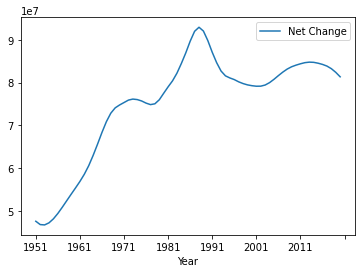

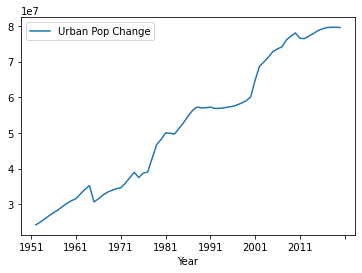

In [3]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd

world_population_url = requests.get('https://www.worldometers.info/world-population/world-population-by-year').text
world_population = BeautifulSoup(world_population_url, 'lxml')

My_world_population = world_population.find_all('table',{'class':'table table-hover table-condensed'})

rows = My_world_population[0].find_all('tr')

i = 0
k = 0
data = {}


year = []
wp = []
ych = []
nch = []
dens = []
up = []
upp = []

#rows[1]

for i in range(1,len(rows)):
    row = rows[i].find_all('td')
    year.append(row[0].get_text().strip())
    wp.append(re.sub(',','',row[1].get_text().strip()))
    ych.append(row[2].get_text().strip())
    nch.append(re.sub(',','',row[3].get_text().strip()))
    dens.append(row[4].get_text().strip())
    up.append(re.sub(',','',row[5].get_text().strip()))
    upp.append(row[6].get_text().strip())

# заголовки
for k in range(len(rows[0].find_all('th'))):
    data[rows[0].find_all('th')[0].get_text().strip()] = year
    data[rows[0].find_all('th')[1].get_text().strip()] = wp
    data[rows[0].find_all('th')[2].get_text().strip()] = ych
    data[rows[0].find_all('th')[3].get_text().strip()] = nch
    data[rows[0].find_all('th')[4].get_text().strip()] = dens
    data[rows[0].find_all('th')[5].get_text().strip()] = up
    data[rows[0].find_all('th')[6].get_text().strip()] = upp
    
df = pd.DataFrame(data)

# считаем только полностью заполненные строки

j = 0
count_filled = 0

for j in range(len(data['YearlyChange'])):
    if data['YearlyChange'][j] != '':
        count_filled += 1
        
count_filled

# заполним новый словарь только для полностью заполненных строк (чтобы могли нарисовать график) 
data_draw = {}

data_draw['Year'] = data['Year'][0:count_filled]
data_draw['World Population'] = list(map(int, data['World Population'][0:count_filled]))
data_draw['Yearly Change'] = data['YearlyChange'][0:count_filled]
data_draw['Net Change'] = list(map(int, data['NetChange'][0:count_filled]))
data_draw['Density (P/Km²)'] = data['Density(P/Km²)'][0:count_filled]
data_draw['Urban Pop'] = list(map(int, data['UrbanPop'][0:count_filled]))
data_draw['Urban Pop %'] = data['UrbanPop %'][0:count_filled]

# изменим порядок элементов на противоположный, чтобы список начинался с 1951 года, а не с 2020
data_draw['Year'].reverse()
data_draw['World Population'].reverse()
data_draw['Yearly Change'].reverse()
data_draw['Net Change'].reverse()
data_draw['Density (P/Km²)'].reverse()
data_draw['Urban Pop'].reverse()
data_draw['Urban Pop %'].reverse()

# для расчета прироста городского населения
urban_delta = []

# для 1951 года не заполняем, так как он базовый для расчета прироста
# но что-то вписать должны, так как рисовалка требует одинаковое число элементов у годов и прироста городского населения
urban_delta.append(None) 

# для всех последующих годов считаем дельту как значение в следующем году минус текущий
p = 0
for p in range(count_filled - 1):
    cur_year = data_draw['Urban Pop'][p]
    next_year = data_draw['Urban Pop'][p+1]
    urban_delta.append(next_year - cur_year)
   
data_draw['Urban Pop Change'] = urban_delta

draw_df = pd.DataFrame(data_draw)

#график ежегодного прироста общего населения
dpl_nc = draw_df.plot(x='Year', y='Net Change')

#график ежегодного прироста городского населения
dpl_up = draw_df.plot(x='Year', y='Urban Pop Change')

draw_df
